In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Load data from the SQLite database
conn = sqlite3.connect('economic_data.db')
economic_data = pd.read_sql('SELECT * FROM economic_data', conn)
conn.close()

# Display the first few rows of the dataset
economic_data.head()


,country,year,GDP (USD),Inflation Rate (%),Unemployment Rate (%),GDP YoY Growth (%)
0,United States,2022,26006893000000,134.211206,3.650,NaN
1,United States,2021,23681171000000,124.266414,5.349,-8.942714
2,United States,2020,21354105000000,118.690502,8.055,-9.826651
3,United States,2019,21539982000000,117.244195,3.669,0.870451
4,United States,2018,20656516000000,115.157303,3.896,-4.101517


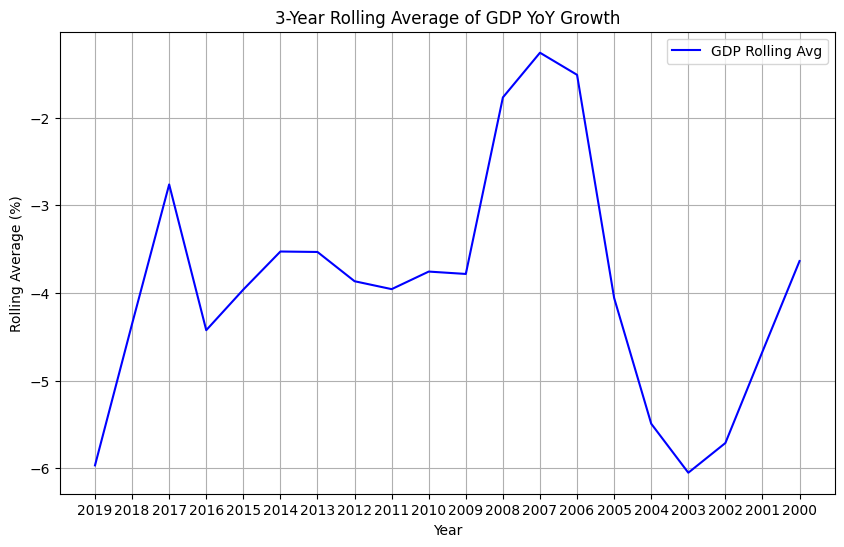

In [2]:
# Calculate a 3-year rolling average for GDP YoY Growth
economic_data['GDP Rolling Avg'] = economic_data['GDP YoY Growth (%)'].rolling(window=3).mean()

# Plot the rolling average
plt.figure(figsize=(10, 6))
plt.plot(economic_data['year'], economic_data['GDP Rolling Avg'], label='GDP Rolling Avg', color='blue')
plt.title('3-Year Rolling Average of GDP YoY Growth')
plt.xlabel('Year')
plt.ylabel('Rolling Average (%)')
plt.legend()
plt.grid()
plt.show()


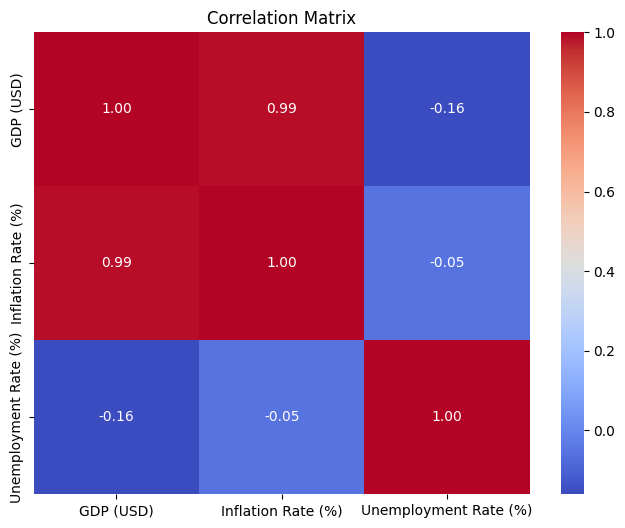

In [3]:
# Select numeric columns for correlation analysis
numeric_cols = ['GDP (USD)', 'Inflation Rate (%)', 'Unemployment Rate (%)']
correlation_matrix = economic_data[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
